# CNN for CIFAR10 with Tensorflow 2

### Import TensorFlow

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
# from tensorflow.keras import datasets, layers, models

# Helper libraries
import matplotlib.pyplot as plt
import numpy as np

print(tf.__version__)

2.4.1


### Download and prepare the CIFAR-10 dataset

In [2]:
# Import and load the CIFAR-10 data directly from tf.keras
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

In [3]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

### Explore the data

In [4]:
train_images.shape

(50000, 32, 32, 3)

In [5]:
len(train_labels)

50000

In [6]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [7]:
test_images.shape

(10000, 32, 32, 3)

In [8]:
len(test_labels)

10000

### Preprocess the data

In [9]:
train_images, test_images = train_images / 255.0, test_images / 255.0

## Build the model

#### Set up parameters

In [10]:
param_epoch_count = 20
param_batch_size = 32
param_act_fn = 'relu'
param_optimizer = 'adam'
param_loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

#### Set up architecture

In [17]:
y_train, y_test = train_labels.flatten(), test_labels.flatten()

# number of classes
K = len(set(y_train))
print("number of classes:", K)

from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, \
                                    Dropout, GlobalMaxPooling2D, MaxPooling2D, \
                                    BatchNormalization

#### Create the convolutional base
i = Input(shape=train_images[0].shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

#### Add Dense layers on top
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = tf.keras.models.Model(i, x)

number of classes: 10


In [18]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496 

#### Compile the model

In [19]:
model.compile(optimizer=param_optimizer,
              loss=param_loss_fn,
              metrics=['accuracy'])

### Train the model

In [20]:
history = model.fit(train_images, train_labels, batch_size=32, epochs=param_epoch_count, validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6950 - accuracy: 0.4487 - val_loss: 0.9943 - val_accuracy: 0.6566
Epoch 2/20
1563/1563 [==============================] - 12s 7ms/step - loss: 0.8759 - accuracy: 0.6952 - val_loss: 0.8773 - val_accuracy: 0.6991
Epoch 3/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7077 - accuracy: 0.7541 - val_loss: 0.6951 - val_accuracy: 0.7625
Epoch 4/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5803 - accuracy: 0.7994 - val_loss: 0.7189 - val_accuracy: 0.7701
Epoch 5/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4717 - accuracy: 0.8379 - val_loss: 0.6566 - val_accuracy: 0.7831
Epoch 6/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4088 - accuracy: 0.8591 - val_loss: 0.6379 - val_accuracy: 0.7982
Epoch 7/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.3424 - accuracy: 0.8811 - val_loss: 0.7040 - val_ac

### Evaluate the model

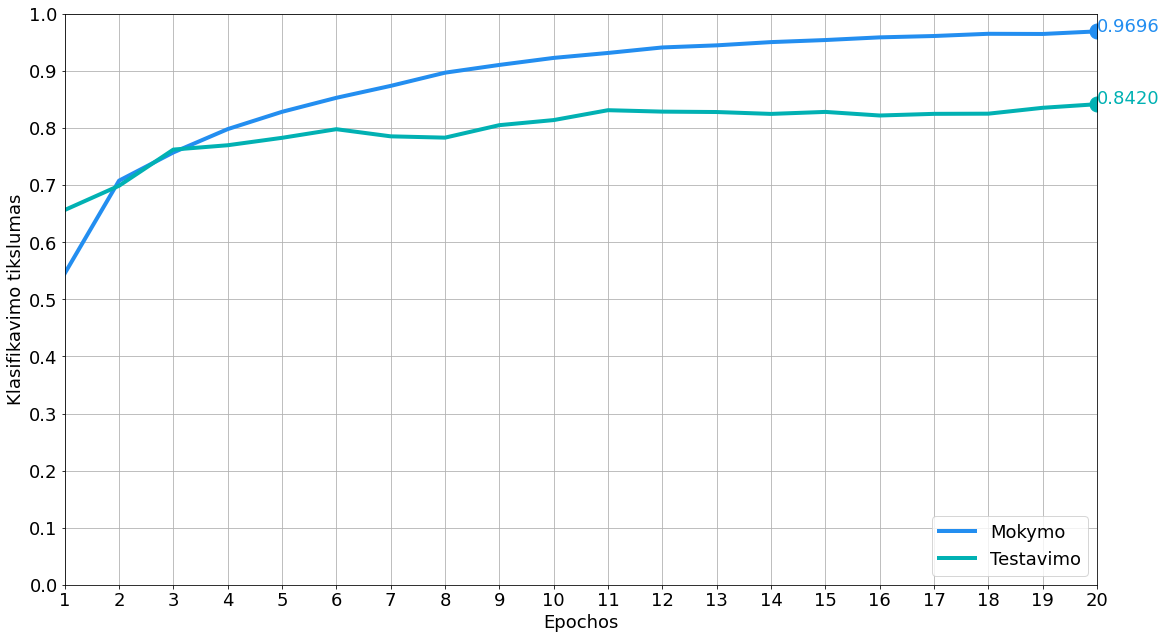

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

ax.xaxis.set_ticks(np.arange(0, param_epoch_count+1))
ax.yaxis.set_ticks(np.arange(0, 1.1, 0.1))
ax.grid()

train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

color_train='#238ef0'
color_test='#01b1b3'

plt.rcParams.update({'font.size': 18})

plt.plot(np.arange(1,param_epoch_count+1), train_acc, label='Mokymo', c=color_train, linewidth=4)
plt.plot(np.arange(1,param_epoch_count+1), test_acc, label='Testavimo', c=color_test, linewidth=4)

plt.plot(param_epoch_count, train_acc[-1],'co', c=color_train, markersize=15)
plt.text(param_epoch_count, train_acc[-1], "{:.4f}".format(train_acc[-1]), c=color_train)

plt.plot(param_epoch_count, test_acc[-1], 'co', c=color_test, markersize=15)
plt.text(param_epoch_count, test_acc[-1], "{:.4f}".format(test_acc[-1]), c=color_test)

plt.xlabel('Epochos', fontsize=18)
plt.ylabel('Klasifikavimo tikslumas', fontsize=18)

plt.xlim([1, param_epoch_count])
plt.ylim([0.0, 1.0])

plt.legend(loc='lower right')

### Classification Report and Confusion Matrix


Classification Report: 

               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1000
           1       0.90      0.94      0.92      1000
           2       0.74      0.78      0.76      1000
           3       0.71      0.69      0.70      1000
           4       0.79      0.85      0.82      1000
           5       0.83      0.72      0.77      1000
           6       0.87      0.89      0.88      1000
           7       0.89      0.89      0.89      1000
           8       0.91      0.93      0.92      1000
           9       0.94      0.85      0.89      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



Confusion Matrix:


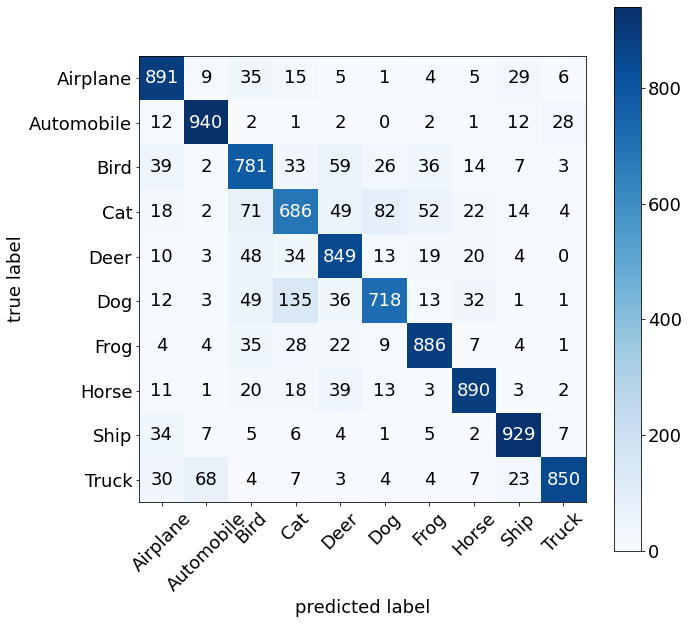

In [24]:
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.utils import shuffle
from mlxtend.plotting import plot_confusion_matrix

predicted_test_images = model.predict(test_images)
predicted_test_image_classes = [np.argmax(element) for element in predicted_test_images]

print("\nClassification Report: \n\n",
      classification_report(test_labels, predicted_test_image_classes))

cmat_multiclass = confusion_matrix(test_labels, predicted_test_image_classes)

print("\n\nConfusion Matrix:")

fig, ax = plot_confusion_matrix(conf_mat=cmat_multiclass,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=False,
                                class_names=class_names,
                                figsize=(10,10))

plt.show()

### Classification results of some images

In [25]:
# calculate the softmax of a vector
# in order to convert vector of outputs
# to vector of probabilities
def softmax(vector):
    e = np.exp(vector)
    return e / e.sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


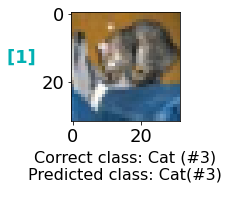

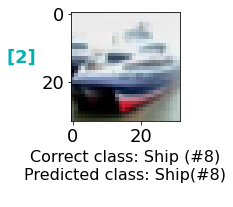

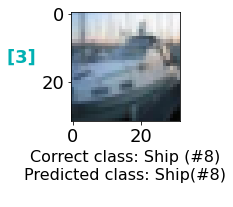

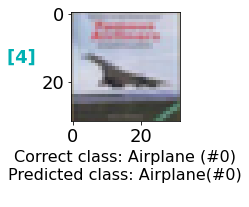

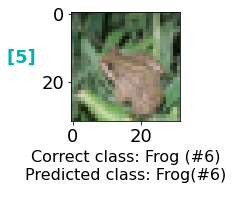

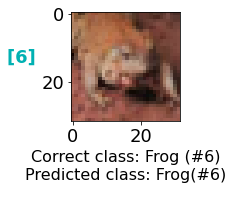

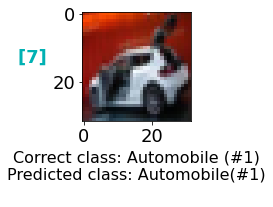

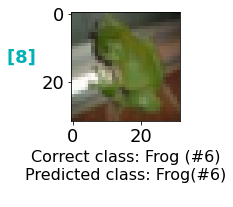

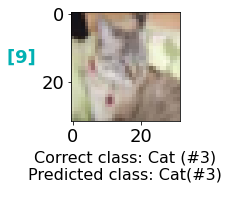

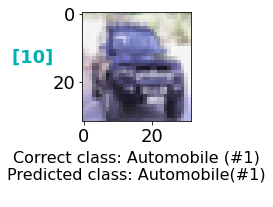

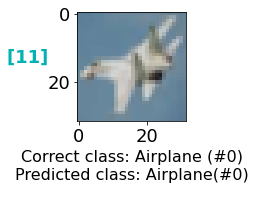

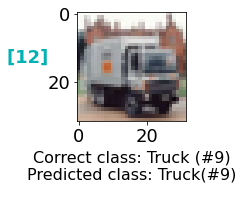

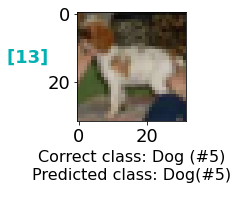

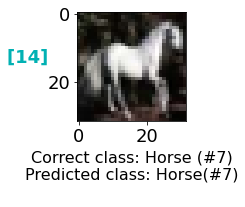

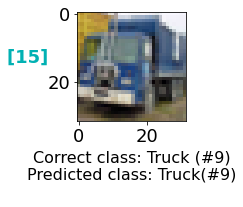

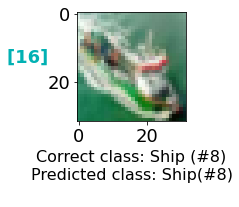

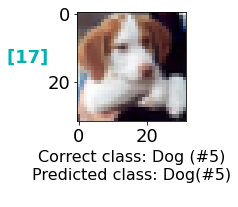

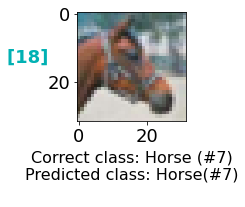

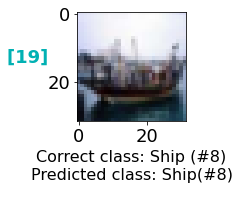

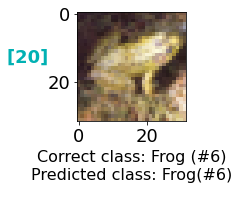

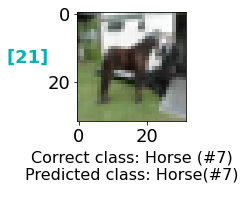

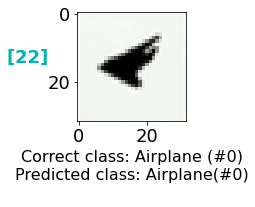

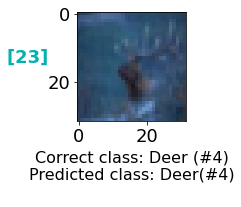

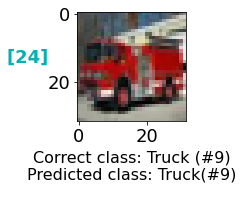

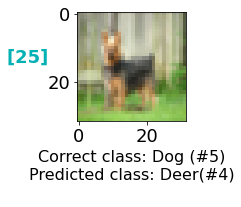

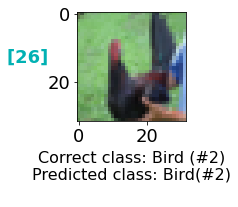

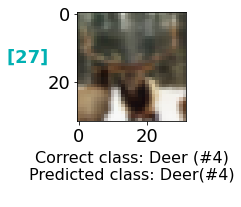

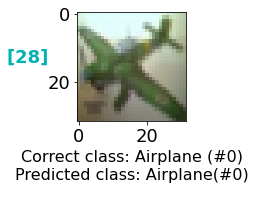

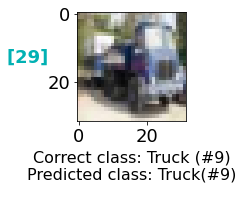

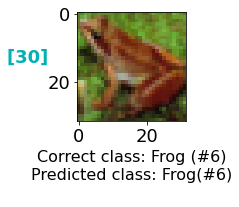

In [29]:
 # select how many images to present
sample_img_count = 30

test_image_predictions = model.predict(test_images[:sample_img_count])
#print(test_image_predictions)

# convert vectors of outputs to vectors of probabilities
test_image_predictions = [softmax(x) for x in test_image_predictions]

# get the classes our CNN predicted
predicted_classes = [np.argmax(element) for element in test_image_predictions]

# get the correct classes
correct_classes = list(test_labels[:sample_img_count].reshape(-1,))

for i in range(sample_img_count):
    ylabel = f'[{i+1}]'
    
    plt.figure(figsize = (15,2))
    plt.imshow(test_images[i])

    xlabel = (
        f'Correct class: {class_names[correct_classes[i]]} (#{correct_classes[i]})\n'
        f'Predicted class: {class_names[predicted_classes[i]]}(#{predicted_classes[i]})\n'
    )
    ylabel = f'[{i+1}]     '
        
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=18, fontweight='bold', color='#01b1b3', rotation=0)

#### The classification probabilites for each class from above:

In [30]:
print('\nOutput probabilities:\n ')

for i in range(sample_img_count):
    print(f'[{i+1}]:\n')

    np.set_printoptions(precision=4, suppress=True)
    print(test_image_predictions[i])
    np.set_printoptions()
    print('\n\n')


Output probabilities:
 
[1]:

[0.0853 0.0853 0.0853 0.232  0.0853 0.0853 0.0853 0.0853 0.0853 0.0853]



[2]:

[0.0853 0.0853 0.0853 0.0853 0.0853 0.0853 0.0853 0.0853 0.232  0.0853]



[3]:

[0.0854 0.0855 0.0854 0.0854 0.0854 0.0854 0.0854 0.0854 0.2317 0.0854]



[4]:

[0.2162 0.0892 0.0866 0.0868 0.0863 0.0863 0.0863 0.0863 0.0874 0.0886]



[5]:

[0.0853 0.0853 0.0853 0.0853 0.0853 0.0853 0.232  0.0853 0.0853 0.0853]



[6]:

[0.0853 0.0853 0.0853 0.0853 0.0853 0.0853 0.232  0.0853 0.0853 0.0853]



[7]:

[0.0854 0.2304 0.0854 0.0854 0.0854 0.0854 0.0854 0.0854 0.0854 0.0861]



[8]:

[0.0856 0.0856 0.087  0.0856 0.0856 0.0856 0.2285 0.0856 0.0856 0.0856]



[9]:

[0.0853 0.0853 0.0853 0.232  0.0853 0.0853 0.0853 0.0853 0.0853 0.0853]



[10]:

[0.0853 0.232  0.0853 0.0853 0.0853 0.0853 0.0853 0.0853 0.0853 0.0853]



[11]:

[0.1849 0.0879 0.0888 0.1073 0.0892 0.0883 0.0881 0.0879 0.0894 0.0882]



[12]:

[0.0853 0.0853 0.0853 0.0853 0.0853 0.0853 0.0853 0.0853 0.0853 0.232 ]



